C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


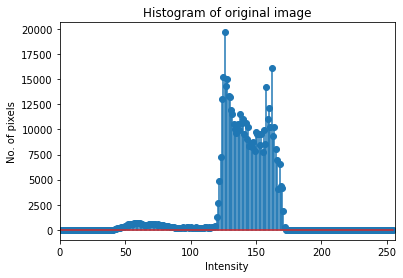

Threshold value : 107


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


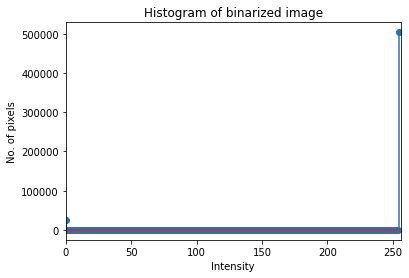

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import re
import pickle

img=cv2.imread('D:/LinearEquationSolver/test_img.jfif',0)
cv2.imshow('Equation Example',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
hist=cv2.calcHist([img],[0],None,[256],[0,256])
plt.stem(hist)
plt.xlabel('Intensity')
plt.ylabel('No. of pixels')
plt.title('Histogram of original image')
plt.xlim([0,256])
plt.show()
thresh_val,thresh_img=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('Image after binarization',thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print('Threshold value : %d'%(thresh_val))
hist=cv2.calcHist([thresh_img],[0],None,[256],[0,256])
plt.stem(hist)
plt.xlabel('Intensity')
plt.ylabel('No. of pixels')
plt.title('Histogram of binarized image')
plt.xlim([0,256])
plt.show()

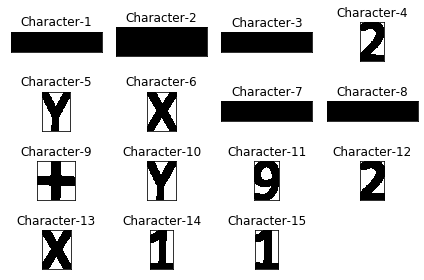

In [ ]:
blurred_img=cv2.medianBlur(thresh_img,3)
kernel=np.ones((3,3),np.uint8)
dilated_img=cv2.erode(blurred_img,kernel)
contours,hierarchy=cv2.findContours(dilated_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img1=cv2.imread('D:/LinearEquationSolver/test_img.jfif')
img2=img1.copy()
cv2.drawContours(img1,contours,-1,(0,0,255),1,hierarchy=hierarchy,maxLevel=2)
cv2.imshow('Image with Contours marked',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
l=len(contours)-1
rect_coordinates=[]
for i in range(1,len(contours)):
    if hierarchy[0,i,3]!=0:
        l=l-1
nrows=(int)(np.ceil(np.sqrt(l)))
subplot_index=1 
for i in range(1,len(contours)):
    if hierarchy[0,i,3]!=0:
        continue
    curr_contour=contours[i]
    x,y,w,h=cv2.boundingRect(curr_contour)
    rect_coordinates.append((x,y))
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),1)
    part=dilated_img[y:y+h,x:x+w].copy()
    part=cv2.erode(part,np.ones((7,7),np.uint8))
    cv2.imwrite('D:/LinearEquationSolver/InputCharacters/Character-%d.jpg'%(subplot_index),part)
    plt.subplot(nrows,nrows,subplot_index)
    plt.imshow(part,cmap='gray')
    plt.title('Character-%d'%(subplot_index))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout(pad=1.08,h_pad=None,w_pad=None,rect=None)
    subplot_index=subplot_index+1
plt.show()
cv2.imshow('Bounding Rectangle',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
L=os.listdir('D:/LinearEquationSolver/CharacterList')
features_zero=[0 for i in range(14)]
features_one=[0 for i in range(14)]
features_two=[0 for i in range(14)]
features_three=[0 for i in range(14)]
features_four=[0 for i in range(14)]
features_five=[0 for i in range(14)]
features_six=[0 for i in range(14)]
features_seven=[0 for i in range(14)]
features_eight=[0 for i in range(14)]
features_nine=[0 for i in range(14)]
features_x=[0 for i in range(14)]
features_y=[0 for i in range(14)]
features_plus=[0 for i in range(14)]
features_minus=[0 for i in range(14)]
features_equalto=[0 for i in range(14)]
for i in range(len(L)):
    img=cv2.imread('D:/LinearEquationSolver/CharacterList/%s'%(L[i]),0)
    thresh_val,img=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    curr_character=(re.split('\.',L[i])[0]).lower()
    (vars()['features_%s'%(curr_character)])[0]=img[0,0]/255
    (vars()['features_%s'%(curr_character)])[1]=img[0,(int)(img.shape[1]/2)]/255
    (vars()['features_%s'%(curr_character)])[2]=img[0,img.shape[1]-1]/255
    (vars()['features_%s'%(curr_character)])[3]=img[(int)(img.shape[0]/2),img.shape[1]-1]/255
    (vars()['features_%s'%(curr_character)])[4]=img[img.shape[0]-1,img.shape[1]-1]/255
    (vars()['features_%s'%(curr_character)])[5]=img[img.shape[0]-1,(int)(img.shape[1]/2)]/255
    (vars()['features_%s'%(curr_character)])[6]=img[img.shape[0]-1,0]/255
    (vars()['features_%s'%(curr_character)])[7]=img[(int)(img.shape[0]/2),0]/255
    (vars()['features_%s'%(curr_character)])[8]=img[(int)(img.shape[0]/2),(int)(img.shape[1]/2)]/255
    (vars()['features_%s'%(curr_character)])[9]=img[(int)(img.shape[0]/3),(int)(img.shape[1]/3)]/255
    (vars()['features_%s'%(curr_character)])[10]=img[(int)(img.shape[0]/3),(int)(2*img.shape[1]/3)]/255
    (vars()['features_%s'%(curr_character)])[11]=img[(int)(2*img.shape[0]/3),(int)(2*img.shape[1]/3)]/255
    (vars()['features_%s'%(curr_character)])[12]=img[(int)(2*img.shape[0]/3),(int)(img.shape[1]/3)]/255
    (vars()['features_%s'%(curr_character)])[13]=max(img.shape[0],img.shape[1])/min(img.shape[0],img.shape[1])*10
with open('D:/LinearEquationSolver/features.pkl','wb') as f:
    pickle.dump([features_zero,features_one,features_two,features_three,features_four,features_five,features_six,features_seven,features_eight,features_nine,features_x,features_y,features_plus,features_minus,features_equalto],f)

Characters recognized in image:(=,Y,9,2,X,1,1,-,=,2,Y,X,=,=,+)


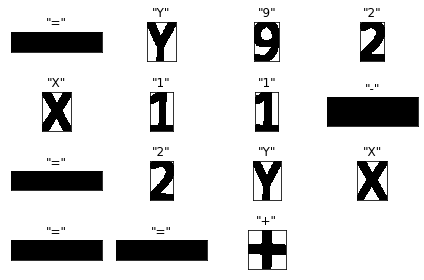

In [ ]:
with open('D:/LinearEquationSolver/features.pkl','rb') as f:
    features_zero,features_one,features_two,features_three,features_four,features_five,features_six,features_seven,features_eight,features_nine,features_x,features_y,features_plus,features_minus,features_equalto=pickle.load(f)
characters=os.listdir('D:/LinearEquationSolver/InputCharacters')
char_array=['placeholder' for i in range(len(characters))]
dict={'zero':'0','one':'1','two':'2','three':'3','four':'4','five':'5','six':'6','seven':'7','eight':'8','nine':'9','x':'X','y':'Y','plus':'+','minus':'-','equalto':'='}
for i in range(len(characters)):
    img=cv2.imread('D:/LinearEquationSolver/InputCharacters/%s'%(characters[i]),0)
    thresh_val,img=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    curr_features=[0 for j in range(14)]
    curr_features[0]=img[0,0]/255
    curr_features[1]=img[0,(int)(img.shape[1]/2)]/255
    curr_features[2]=img[0,img.shape[1]-1]/255
    curr_features[3]=img[(int)(img.shape[0]/2),img.shape[1]-1]/255
    curr_features[4]=img[img.shape[0]-1,img.shape[1]-1]/255
    curr_features[5]=img[img.shape[0]-1,(int)(img.shape[1]/2)]/255
    curr_features[6]=img[img.shape[0]-1,0]/255
    curr_features[7]=img[(int)(img.shape[0]/2),0]/255
    curr_features[8]=img[(int)(img.shape[0]/2),(int)(img.shape[1]/2)]/255
    curr_features[9]=img[(int)(img.shape[0]/3),(int)(img.shape[1]/3)]/255
    curr_features[10]=img[(int)(img.shape[0]/3),(int)(2*img.shape[1]/3)]/255
    curr_features[11]=img[(int)(2*img.shape[0]/3),(int)(2*img.shape[1]/3)]/255
    curr_features[12]=img[(int)(2*img.shape[0]/3),(int)(img.shape[1]/3)]/255
    curr_features[13]=max(img.shape[0],img.shape[1])/min(img.shape[0],img.shape[1])*10
    error=[0 for j in range(len(L))]
    for j in range(len(L)):
        curr_character=(re.split('\.',L[j])[0]).lower()
        curr_feature_compare=vars()['features_%s'%(curr_character)]
        error[j]=np.sum(np.abs(np.array(curr_features)-np.array(curr_feature_compare)))
    pos=np.where(error==np.amin(error))[0][0]
    recognized_character=(re.split('\.',L[pos])[0]).lower()
    char_array[i]=dict[recognized_character]
print('Characters recognized in image:(',end='')
print(*char_array,sep=',',end='')
print(')')
subplot_index=1
for i in range(len(characters)):
    img=cv2.imread('D:/LinearEquationSolver/InputCharacters/%s'%(characters[i]),0)
    plt.subplot(nrows,nrows,subplot_index)
    plt.imshow(img,cmap='gray')
    plt.title('\"%s\"'%(char_array[i]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout(pad=1.08,h_pad=None,w_pad=None,rect=None)
    subplot_index=subplot_index+1

In [ ]:
y_coordinates=[]
if (len(rect_coordinates)>=10):
    mod_rect_coordinates=[]
    mod_rect_coordinates.append(rect_coordinates[0])
    mod_rect_coordinates.extend(rect_coordinates[9:])
    mod_rect_coordinates.extend(rect_coordinates[1:9])
    rect_coordinates=mod_rect_coordinates
for i in range(len(rect_coordinates)):
    y_coordinates.append(rect_coordinates[i][1])
img=cv2.imread('D:/LinearEquationSolver/test_img.jfif',0)
min_y=min(y_coordinates)
equation_1=[]
equation_1_coordinates=[]
equation_2=[]
equation_2_coordinates=[]
for i in range(len(y_coordinates)):
    if (y_coordinates[i]-min_y<=img.shape[0]/6):
        equation_1.append(char_array[i])
        equation_1_coordinates.append(rect_coordinates[i])
    else:
        equation_2.append(char_array[i])
        equation_2_coordinates.append(rect_coordinates[i])
for i in range(len(equation_1)-1):
    for j in range(len(equation_1)-1):
        if (equation_1_coordinates[j][0]>equation_1_coordinates[j+1][0]):
            temp=equation_1[j]
            equation_1[j]=equation_1[j+1]
            equation_1[j+1]=temp
            temp=equation_1_coordinates[j]
            equation_1_coordinates[j]=equation_1_coordinates[j+1]
            equation_1_coordinates[j+1]=temp
for i in range(len(equation_2)-1):
    for j in range(len(equation_2)-1):
        if (equation_2_coordinates[j][0]>equation_2_coordinates[j+1][0]):
            temp=equation_2[j]
            equation_2[j]=equation_2[j+1]
            equation_2[j+1]=temp
            temp=equation_2_coordinates[j]
            equation_2_coordinates[j]=equation_2_coordinates[j+1]
            equation_2_coordinates[j+1]=temp
for i in range(len(equation_1)):
    if (equation_1[i]=='='):
        equation_1.pop(i)
        break
for i in range(len(equation_2)):
    if (equation_2[i]=='='):
        equation_2.pop(i)
        break
equation_1=''.join(equation_1)
equation_2=''.join(equation_2)
print('Equation 1 : %s'%(equation_1))
print('Equation 2 : %s'%(equation_2))

Equation 1 : 11X+2Y=9
Equation 2 : X-Y=2


In [ ]:
eq1_nums=['','','']
counter=0
eq2_nums=['','','']
for i in range(len(equation_1)):
    if ((equation_1[i]=='+' or equation_1[i]=='-' or equation_1[i]=='=') and i!=0):
        if (len(eq1_nums[counter])==0 or eq1_nums=='-'):
            eq1_nums[counter]=eq1_nums[counter]+'1'
        counter=counter+1
    if (counter>=3):
        if (eq1_nums[2][0]=='-'):
            eq1_nums[2]=eq1_nums[2][1:len(eq1_nums[2])]
        else:
            eq1_nums[2]='-'+eq1_nums[2]
        break
    if (equation_1[i].isnumeric() or equation_1[i]=='-' or equation_1[i]=='.'):
        eq1_nums[counter]=eq1_nums[counter]+equation_1[i]
counter=0
for i in range(len(equation_2)):
    if ((equation_2[i]=='+' or equation_2[i]=='-' or equation_2[i]=='=') and i!=0):
        if (len(eq2_nums[counter])==0 or eq2_nums[counter]=='-'):
            eq2_nums[counter]=eq2_nums[counter]+'1'
        counter=counter+1
    if (counter>=3):
        if (eq2_nums[2][0]=='-'):
            eq2_nums[2]=eq2_nums[2][1:len(eq1_nums[2])]
        else:
            eq2_nums[2]='-'+eq2_nums[2]
        break
    if (equation_2[i].isnumeric() or equation_2[i]=='-' or equation_2[i]=='.'):
        eq2_nums[counter]=eq2_nums[counter]+equation_2[i]
a1,b1,c1=eq1_nums
a2,b2,c2=eq2_nums
a1=(float)(a1)
b1=(float)(b1)
c1=-1*(float)(c1)
a2=(float)(a2)
b2=(float)(b2)
c2=-1*(float)(c2)
X=(1.0*b1*c2-b2*c1)/(a1*b2-a2*b1)
Y=(1.0*c1*a2-c2*a1)/(a1*b2-a2*b1)
print('X=%f'%(X))
print('Y=%f'%(Y))

X=1.000000
Y=-1.000000
